In [1]:
import json
results = {}
with open("CEL_files/results") as f:
    results= json.load(f)

In [2]:
results["results"]

{'1024': 0.509765625,
 '128': 0.484375,
 '16384': 0.34521484375,
 '2048': 0.470703125,
 '22011': 0.33645284390332547,
 '256': 0.671875,
 '32': 0.4375,
 '4096': 0.4248046875,
 '512': 0.58984375,
 '64': 0.5625,
 '8192': 0.393798828125}

In [3]:
results["resultsRandom"]

{'1024': [0.30078125,
  0.27734375,
  0.2890625,
  0.26171875,
  0.2734375,
  0.275390625,
  0.3125,
  0.2890625,
  0.263671875,
  0.265625,
  0.26953125,
  0.306640625,
  0.310546875,
  0.291015625,
  0.279296875,
  0.263671875,
  0.30078125,
  0.2734375,
  0.2890625,
  0.25390625,
  0.3046875,
  0.318359375,
  0.234375,
  0.30859375,
  0.30078125,
  0.28515625,
  0.259765625,
  0.298828125,
  0.26953125,
  0.27734375,
  0.310546875,
  0.287109375,
  0.314453125,
  0.314453125,
  0.259765625,
  0.251953125,
  0.255859375,
  0.275390625,
  0.265625,
  0.283203125,
  0.26953125,
  0.28515625,
  0.291015625,
  0.25390625,
  0.310546875,
  0.302734375,
  0.25390625,
  0.26953125,
  0.294921875,
  0.3046875,
  0.318359375,
  0.26171875,
  0.306640625,
  0.287109375,
  0.26171875,
  0.30859375,
  0.30078125,
  0.283203125,
  0.302734375,
  0.29296875,
  0.283203125,
  0.2890625,
  0.275390625,
  0.263671875,
  0.24609375,
  0.28515625,
  0.302734375,
  0.287109375,
  0.291015625,
  0.3125,


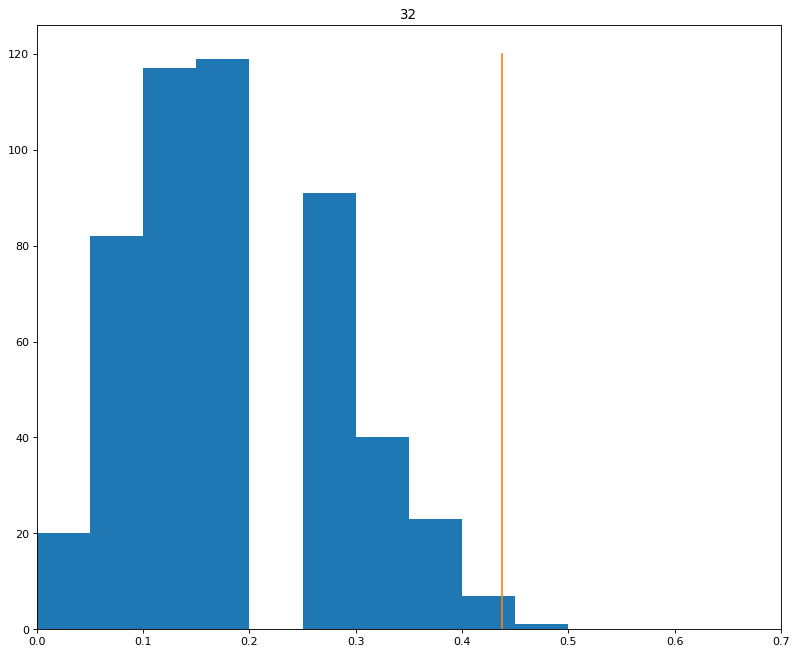

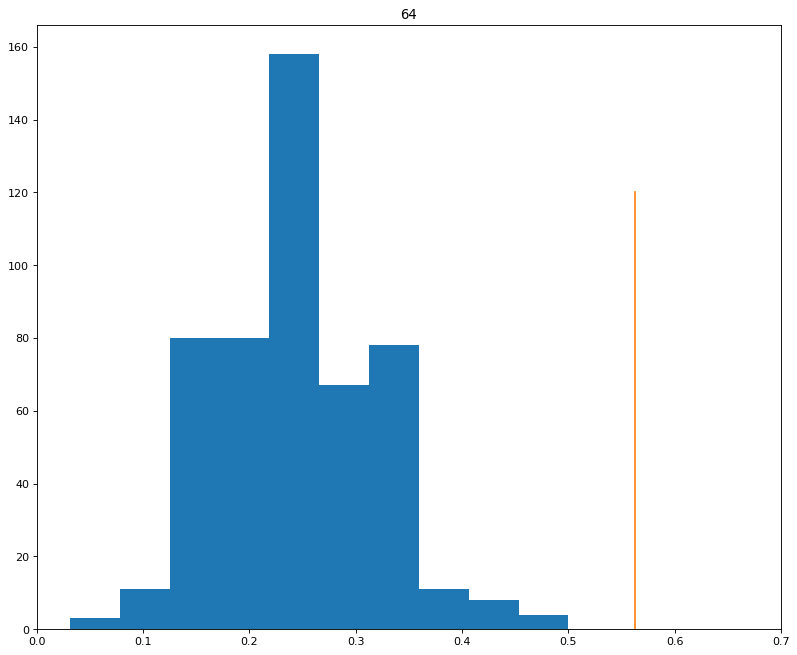

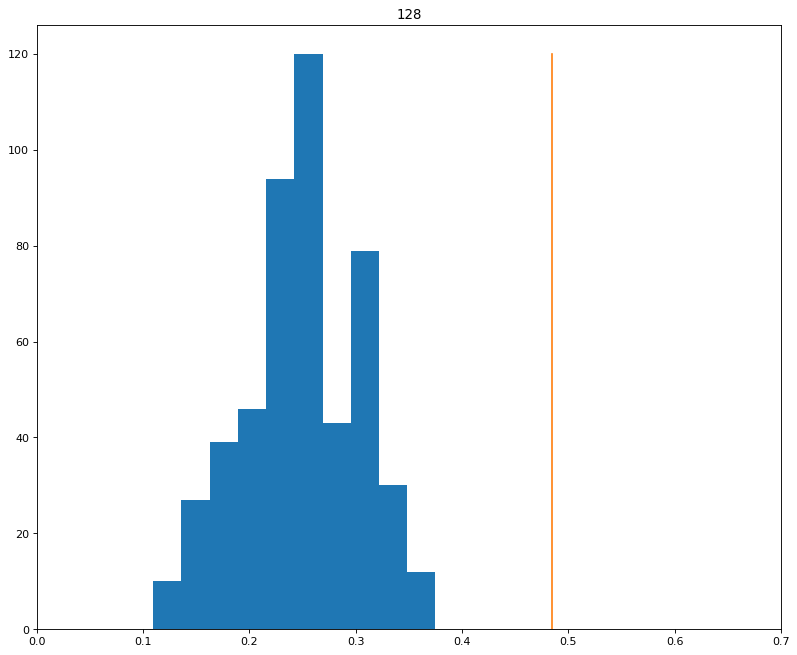

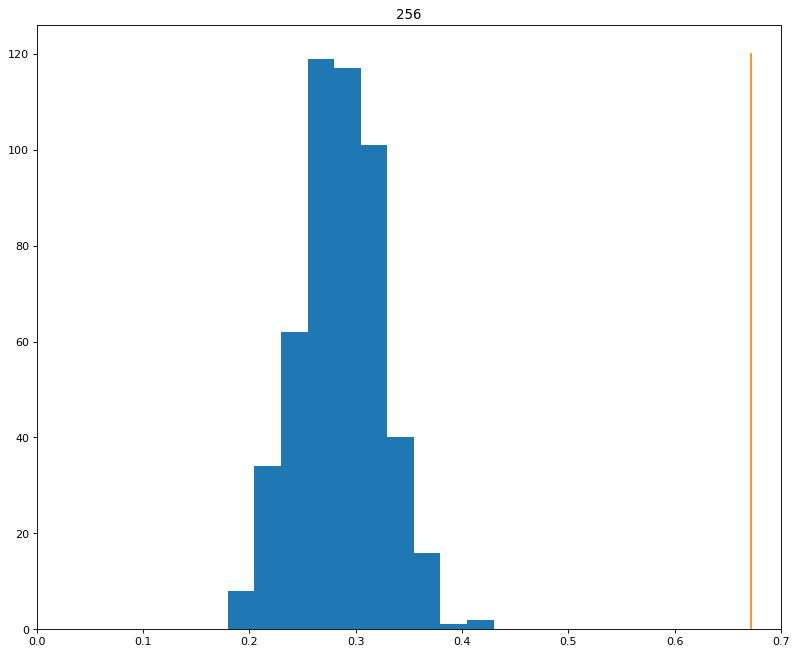

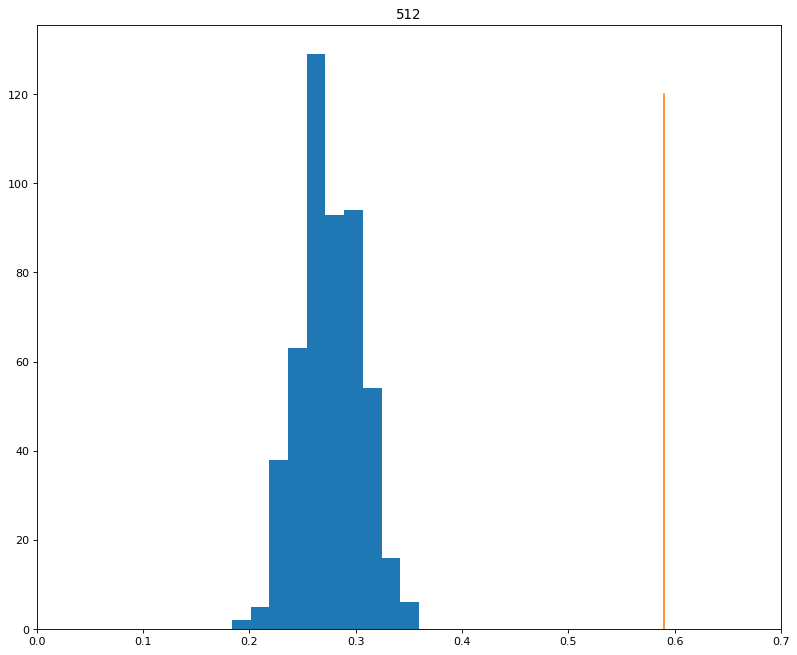

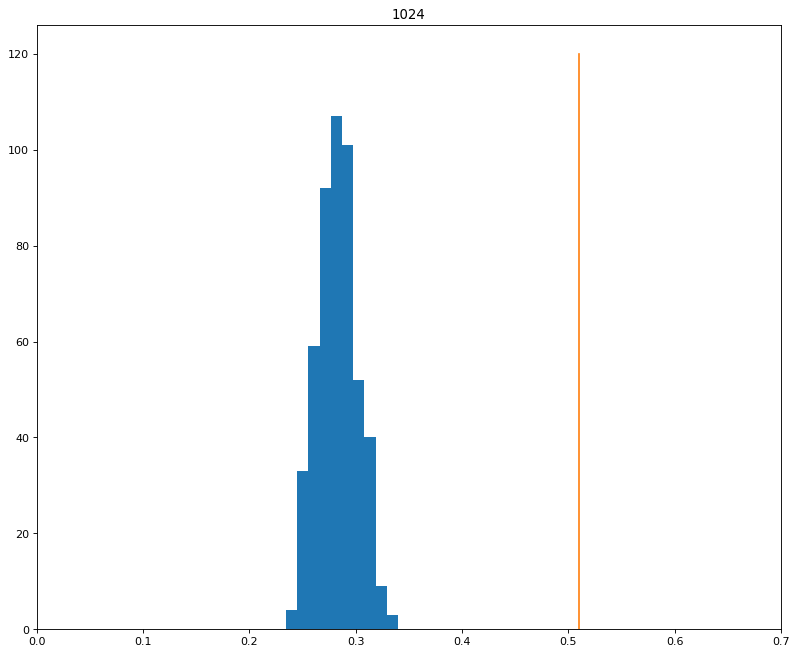

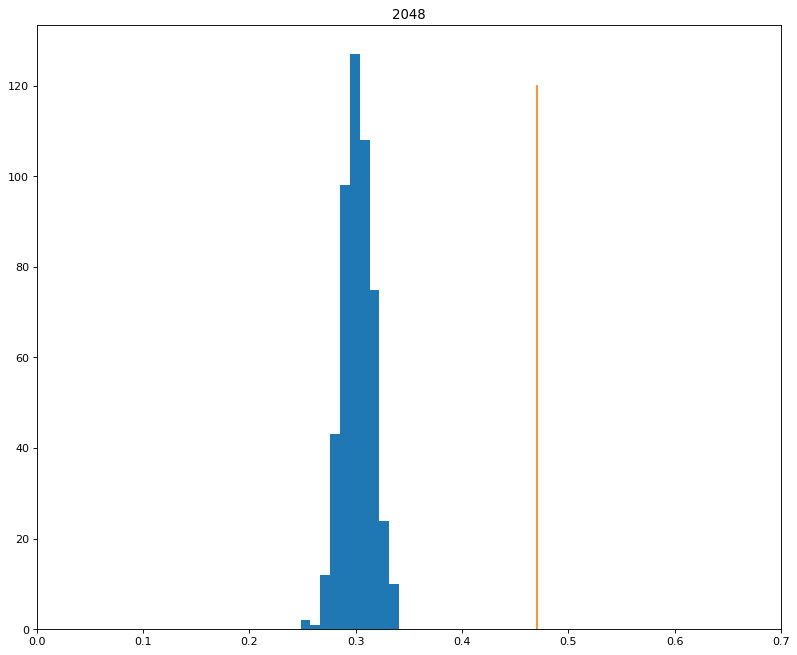

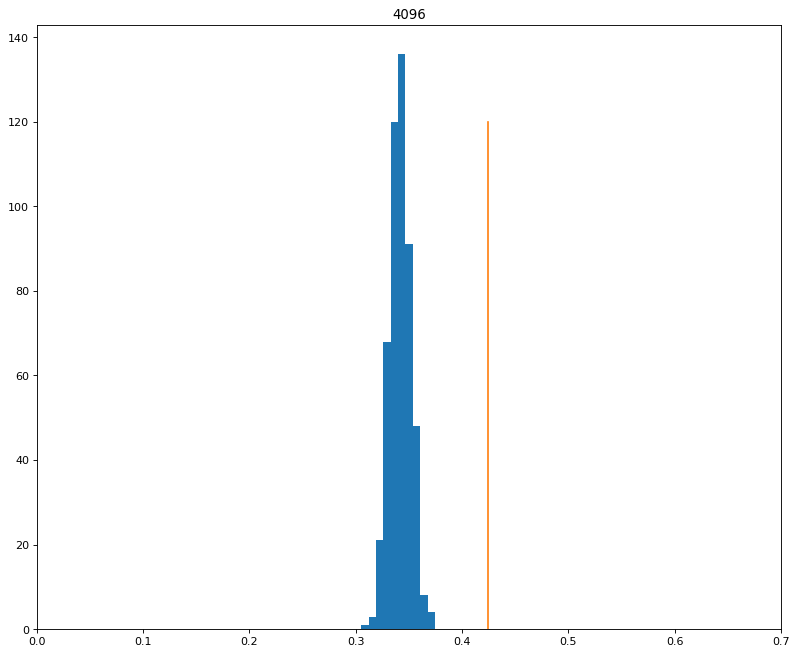

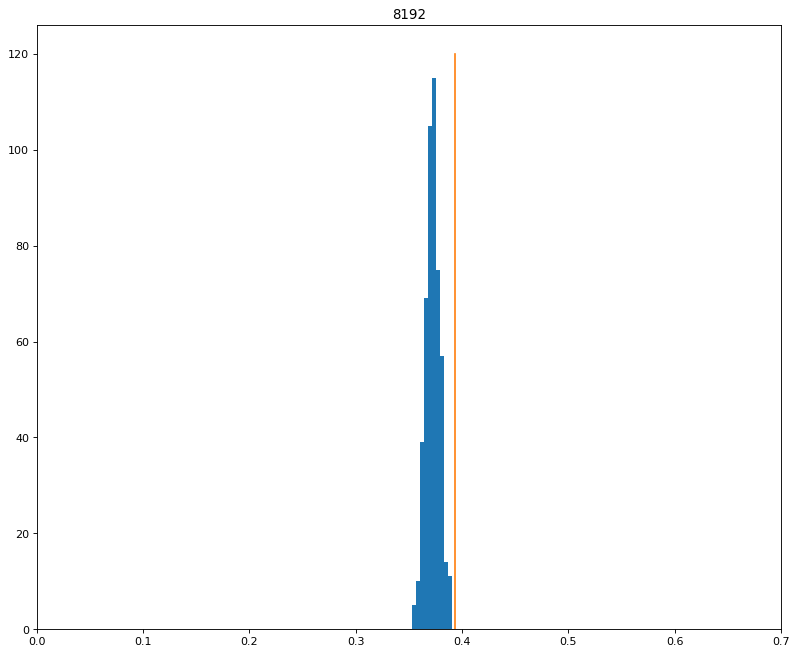

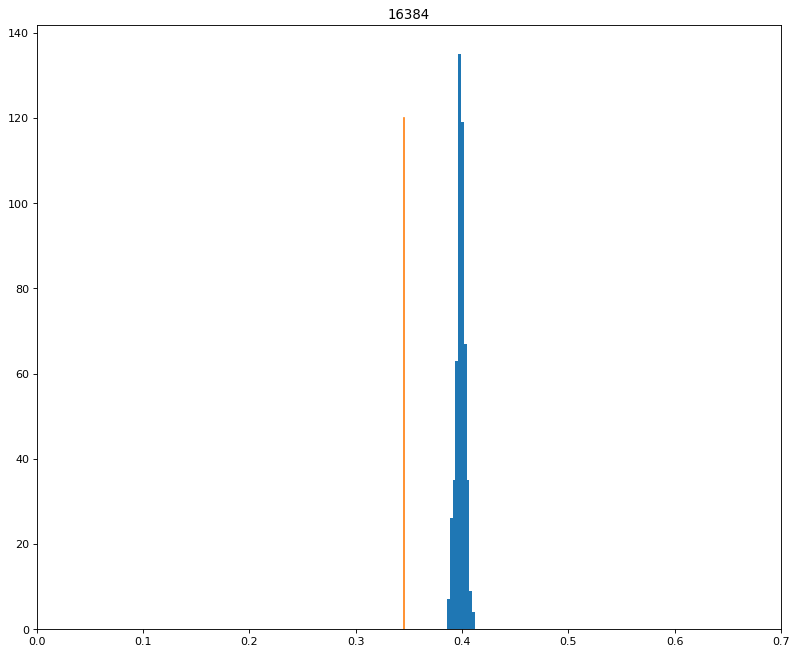

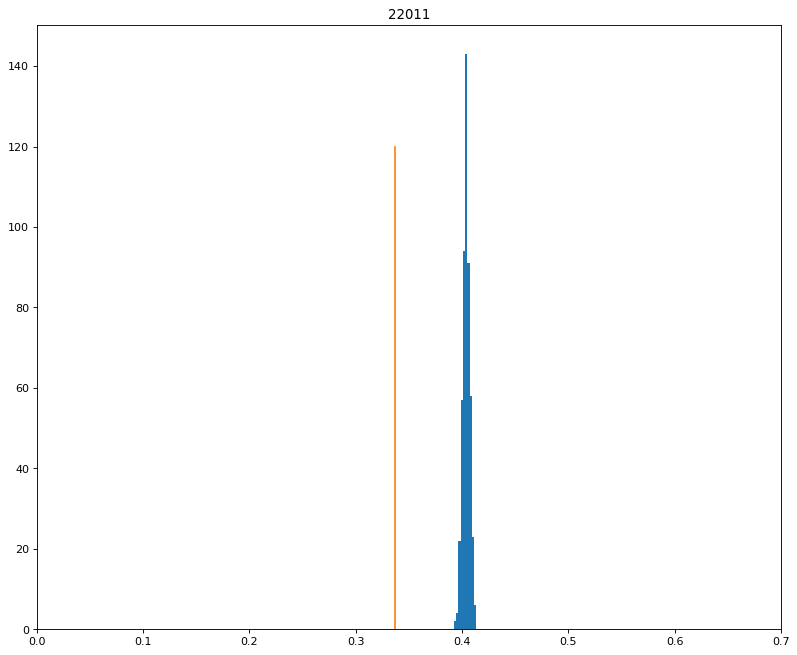

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
for key in results["resultsRandom"]:
    plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.title(key)
    plt.hist(results["resultsRandom"][key])
    result = results["results"][key]
    plt.xlim(0, 0.7)
    plt.plot([result, result], [0, 120])

In [10]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        array

# p-value of the simulation (500 simulated fudge factors) of the distribution of the fraction of improved raw p-values

In [4]:
def proportion_p_value(value, distribution):
    d2 = sorted(distribution)
    place = 0
    for i, j in enumerate(d2):
        if j < value:
            place += 1
    return 1 - (float(place) / (len(distribution)))

In [5]:
for key in results["results"]:
    value = results["results"][key]
    distribution = results["resultsRandom"][key]
    print(key, "genes DSE existence p-value =", proportion_p_value(value, distribution))

32 genes DSE existence p-value = 0.016000000000000014
64 genes DSE existence p-value = 0.0
128 genes DSE existence p-value = 0.0
256 genes DSE existence p-value = 0.0
512 genes DSE existence p-value = 0.0
1024 genes DSE existence p-value = 0.0
2048 genes DSE existence p-value = 0.0
4096 genes DSE existence p-value = 0.0
8192 genes DSE existence p-value = 0.0
16384 genes DSE existence p-value = 1.0
22011 genes DSE existence p-value = 1.0


# How many genes at FDR of 0.5?

In [6]:
X = [i for i in results["QA"] if i[0] < 0.5]
print(len(X), "of total", len(results["QA"]))

14391 of total 22011


# Unadjusted p-values

In [8]:
import math
import matplotlib.pyplot as plt
no = 100
for dataset in ["SEPSIS"]:
    values = []
    for i, j in sorted(results["QA_P"][:no]):
        values.append(math.log(i, 10))
    fig = plt.figure()
    plt.step(values, np.arange(len(values)))
    fig.suptitle(str(no) + ' most significant p-values for ' + dataset + " dataset", fontsize=20)
    plt.ylabel('number of genes at a given p-value threshold', fontsize=18)
    plt.xlabel('log_10 of p-value threshold.', fontsize=16)
    plt.show()

NameError: name 'np' is not defined